In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Učitati podatke u DataFrame. Koliko ima uzoraka? Koliko ima obeležja i kog su tipa?

In [36]:
# Read dataset to pandas dataframe
!gdown 18LShd5kJch5nxHbHxYkkI_qRlrQ60WmL
cols = ['class', 'services', 'cost', 'schools', 'police', 'streets', 'events']
dataset = pd.read_csv('SomervilleHappinessSurvey2015.csv', encoding = "utf-16")
dataset.columns = cols
print(dataset.shape)
dataset.head()

Downloading...
From: https://drive.google.com/uc?id=18LShd5kJch5nxHbHxYkkI_qRlrQ60WmL
To: /content/SomervilleHappinessSurvey2015.csv
100% 4.33k/4.33k [00:00<00:00, 12.2MB/s]
(143, 7)


,class,services,cost,schools,police,streets,events
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [37]:
X = dataset.iloc[:, 1:] #obeležja
y = dataset.iloc[:, 0] #labele


Proveriti koliko uzoraka ima u kojoj klasi, kao i da li ima nedostajućih vrednosti.


In [38]:
print("broj uzoraka u klasi 1 je: ", sum(y==1))
print("broj uzoraka u klasi 0 je: ", sum(y==0))
print("broj nedostajućih podataka je: ", X.isnull().sum().sum())

broj uzoraka u klasi 1 je:  77
broj uzoraka u klasi 0 je:  66
broj nedostajućih podataka je:  0


## Unakrsna validacija

## K fold

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=10,stratify=y)

In [40]:
# 📦 Import neophodnih biblioteka
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np  # Ako već nije importovano

# 🎯 Postavljanje Stratified K-Fold (5 podskupova sa očuvanjem proporcije klasa)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # random_state za konzistentnost

# 🔁 Dobijamo indekse za svaku podelu
indexes = kf.split(x_train, y_train)

# 🧮 Inicijalizujemo matricu konfuzije za sumiranje kroz sve foldove
fin_conf_mat = np.zeros((len(np.unique(y)), len(np.unique(y))))

# 🔁 K-Fold petlja
for train_index, test_index in indexes:
    # 🧠 KNN klasifikator sa 5 komšija i Hamming metričkom
    classifier = KNeighborsClassifier(n_neighbors=5, metric='hamming')

    # 🎓 Treniramo model na trenutnom trening skupu
    classifier.fit(x_train.iloc[train_index, :], y_train.iloc[train_index])

    # 🔮 Predviđamo klase na trenutnom validacionom (test) skupu
    y_pred = classifier.predict(x_train.iloc[test_index, :])

    # 📊 Računamo matricu konfuzije za ovu podelu
    conf_mat = confusion_matrix(y_train.iloc[test_index], y_pred)
    print(conf_mat)

    # ➕ Sabiramo u ukupnu matricu
    fin_conf_mat += conf_mat

# 📢 Prikaz ukupne matrice konfuzije nakon svih foldova
print('Finalna (sabirna) matrica konfuzije je:')
print(fin_conf_mat)


[[ 5  7]
 [ 3 11]]
[[5 7]
 [6 8]]
[[ 3  9]
 [ 2 12]]
[[ 3  8]
 [ 4 10]]
[[4 8]
 [4 9]]
Finalna (sabirna) matrica konfuzije je:
[[20. 39.]
 [19. 50.]]


In [41]:
TP = fin_conf_mat[1, 1]
TN = fin_conf_mat[0, 0]
FP = fin_conf_mat[0, 1]
FN = fin_conf_mat[1, 0]
precision = TP/(TP+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
sensitivity = TP/(TP+FN)
F_score = 2*precision*sensitivity/(precision+sensitivity)
print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('F score: ', F_score)

precision:  0.5617977528089888
accuracy:  0.546875
sensitivity/recall:  0.7246376811594203
F score:  0.6329113924050632


In [42]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[1,2,3,4,5], 'metric':('hamming', 'euclidean', 'manhattan')}
classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters, scoring='accuracy', cv=5, verbose=3)
clf.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .....metric=hamming, n_neighbors=1;, score=0.654 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=1;, score=0.538 total time=   0.0s
[CV 3/5] END .....metric=hamming, n_neighbors=1;, score=0.769 total time=   0.0s
[CV 4/5] END .....metric=hamming, n_neighbors=1;, score=0.600 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=1;, score=0.520 total time=   0.0s
[CV 1/5] END .....metric=hamming, n_neighbors=2;, score=0.692 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=2;, score=0.462 total time=   0.0s
[CV 3/5] END .....metric=hamming, n_neighbors=2;, score=0.808 total time=   0.0s
[CV 4/5] END .....metric=hamming, n_neighbors=2;, score=0.560 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=2;, score=0.640 total time=   0.0s
[CV 1/5] END .....metric=hamming, n_neighbors=3;, score=0.615 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=3;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('hamming', 'euclidean', 'manhattan'),
                         'n_neighbors': [1, 2, 3, 4, 5]},
             scoring='accuracy', verbose=3)

In [43]:
print("najbolji skor: ", clf.best_score_)
print("najbolji hiperparametri: ", clf.best_params_)

najbolji skor:  0.6323076923076922
najbolji hiperparametri:  {'metric': 'hamming', 'n_neighbors': 2}


**Dodatna tabela**

In [44]:
# 📋 Prikaz svih isprobanih kombinacija sa njihovim rezultatima
import pandas as pd

results_df = pd.DataFrame(clf.cv_results_)
display(results_df[['param_n_neighbors', 'param_metric', 'mean_test_score']])


,param_n_neighbors,param_metric,mean_test_score
0,1,hamming,0.616308
1,2,hamming,0.632308
2,3,hamming,0.584615
3,4,hamming,0.600000
4,5,hamming,0.624000
5,1,euclidean,0.515077
6,2,euclidean,0.546769
7,3,euclidean,0.554154
8,4,euclidean,0.577538
9,5,euclidean,0.576615


---------------------------------------------------------------------------

In [45]:
# obuka konacnog modela
classifier = KNeighborsClassifier(n_neighbors=2, metric='hamming')
classifier.fit(x_train,y_train)

# testiranjeaccuracy
y_pred = classifier.predict(x_test)
for i,j in zip(y_pred, y_test):
  print(i,j)

0 0
0 1
0 1
0 0
0 0
0 1
1 1
1 0
0 1
1 1
0 0
1 1
0 0
0 0
1 1


In [46]:
classifier.classes_

array([0, 1])

In [47]:
conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_) # TN, FP
print(conf_mat)                                                         # FN, TP

[[6 1]
 [4 4]]


**TN (True Negative): Ispravno klasifikovani kao 0

TP (True Positive): Ispravno klasifikovani kao 1

FP (False Positive): Pogrešno klasifikovani kao 1 (a trebalo je 0)

FN (False Negative): Pogrešno klasifikovani kao 0 (a trebalo je 1) **

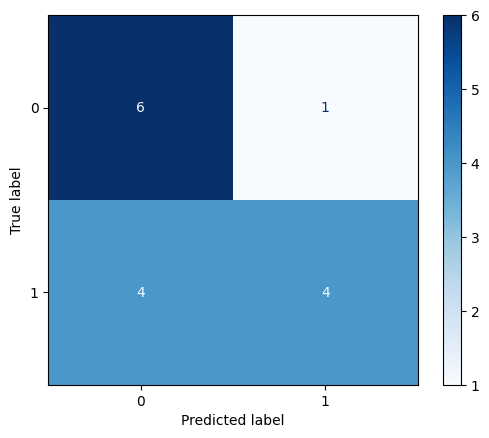

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues")

In [49]:
from sklearn import metrics

# 🎯 Precision: Koliki procenat svih pozitivno klasifikovanih primera je zaista pozitivan?
# Odnos true positive (TP) u odnosu na sve koje je model označio kao pozitivne (TP + FP).
precision = metrics.precision_score(y_test, y_pred)

# ✅ Accuracy: Ukupna tačnost modela — koliko primera je ispravno klasifikovano?
# Odnos svih tačnih klasifikacija (TP + TN) prema ukupnom broju primera.
accuracy = metrics.accuracy_score(y_test, y_pred)

# 📈 Sensitivity / Recall: Koliki procenat stvarno pozitivnih primera je model prepoznao kao pozitivne?
# Odnos true positive (TP) prema ukupnom broju stvarno pozitivnih (TP + FN).
sensitivity = metrics.recall_score(y_test, y_pred)

# ⚖️ F1-score: Harmonijska sredina precision i recall. Koristi se kada je bitan balans između njih.
# Koristan u slučaju neuravnoteženih klasa.
f_score = metrics.f1_score(y_test, y_pred)

# 🖨️ Ispis svih metrika
print('Precision:', precision)
print('Accuracy:', accuracy)
print('Sensitivity / Recall:', sensitivity)
print('F1 Score:', f_score)


Precision: 0.8
Accuracy: 0.6666666666666666
Sensitivity / Recall: 0.5
F1 Score: 0.6153846153846154


In [50]:
from sklearn.metrics import classification_report

# 📝 Prikaz klasifikacionog izveštaja
print(classification_report(y_test, y_pred))

# 📌 Objašnjenje metrika po klasama:
# ----------------------------------------------------------
# precision: Od svih predikcija za klasu, koliko je tačnih?
# recall: Od svih stvarnih instanci klase, koliko je tačno prepoznato?
# f1-score: Harmonijska sredina između precision i recall (balansirana mera)
# support: Koliko primera ima za svaku klasu (broj uzoraka u test skupu)
#
# accuracy: Ukupan procenat tačno klasifikovanih uzoraka (celokupan test skup)
#
# macro avg: Prosek svih metrika po klasama (tretira sve klase jednako)
# weighted avg: Prosek metrika po klasama uzimajući u obzir broj uzoraka (support)


              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.80      0.50      0.62         8

    accuracy                           0.67        15
   macro avg       0.70      0.68      0.66        15
weighted avg       0.71      0.67      0.66        15



## Leave one out

Ponoviti računanje mera za klasifikator sa optimalnim parametrima koristeći unakrsnu validaciju sa jednim izdvojenim uzorkom LeaveOneOut. Da li se rezultati razlikuju? Zašto?

In [51]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# ✅ Leave-One-Out cross-validation (LOOCV)
cv = LeaveOneOut()

# Koristimo optimalan model dobijen iz GridSearchCV
model = KNeighborsClassifier(n_neighbors=2, metric='hamming')

# Izračunavanje tačnosti (accuracy) za svaki od N uzoraka
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

# Prikaz prosečne tačnosti preko svih iteracija
print("LOOCV accuracy:", np.mean(np.absolute(scores)))

# 📝 Objašnjenje:
# Leave-One-Out koristi svaki uzorak kao poseban test skup, a ostatak kao trening.
# Znači da se model trenira N puta (N = broj uzoraka).
# Ova metoda daje vrlo pouzdanu procenu performansi, ali je veoma osetljiva na šum.
# Razlike u rezultatima (u odnosu na KFold ili klasični train/test split) mogu nastati
# zbog velike varijanse i male veličine test skupa (samo 1 uzorak po iteraciji).
# LOOCV se često koristi kod malih datasetova jer koristi maksimalno raspoložive podatke za treniranje.


LOOCV accuracy: 0.5664335664335665


## Standardizacija?

Da li je bitno standardizovati obeležja kod KNN algoritma? Ima li u ovom konkretnom problemu smisla standardizovati obeležja? Ako ima ponoviti postupak sa standardizovanim obeležjima.

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# ✅ Inicijalizacija KNN klasifikatora sa odgovarajućom metrikom za numeričke podatke
classifier = KNeighborsClassifier(n_neighbors=2, metric='euclidean')

# ⚠️ Standardizacija je jako bitna za KNN kada koristimo distance-based metrike poput 'euclidean' ili 'manhattan'
# Bez nje, obeležja sa većim rasponima mogu dominirati u računanju udaljenosti.

s = StandardScaler()
s.fit(x_train)

# Standardizovani tren/test skupovi (npr. transformisani tako da imaju srednju vrednost 0 i std devijaciju 1)
x_train_std = s.transform(x_train)
x_test_std = s.transform(x_test)

# Pretvaranje nazad u DataFrame radi lakšeg praćenja i očuvanja imena kolona
x_train_std = pd.DataFrame(x_train_std, columns=X.columns)
x_test_std = pd.DataFrame(x_test_std, columns=X.columns)

# 🎯 Obuka modela na standardizovanim podacima
classifier.fit(x_train_std, y_train)

# 🔍 Testiranje modela
y_pred = classifier.predict(x_test_std)

# 🖨️ Prikaz predikcija i stvarnih vrednosti
for i, j in zip(y_pred, y_test):
    print("Predikcija:", i, "| Stvarna:", j)

# 📝 Objašnjenje:
# - KNN klasifikator koristi udaljenosti da bi pronašao najbliže komšije.
# - Ako su obeležja u različitim skalama, udaljenost može biti iskrivljena.
# - Zato je preporučljivo standardizovati podatke kada se koriste numeričke metrike.
# - Ako koristiš 'hamming' metriku (za kategoričke/dummy podatke), standardizacija nije potrebna.


Predikcija: 0 | Stvarna: 0
Predikcija: 0 | Stvarna: 1
Predikcija: 0 | Stvarna: 1
Predikcija: 1 | Stvarna: 0
Predikcija: 0 | Stvarna: 0
Predikcija: 0 | Stvarna: 1
Predikcija: 0 | Stvarna: 1
Predikcija: 1 | Stvarna: 0
Predikcija: 0 | Stvarna: 1
Predikcija: 1 | Stvarna: 1
Predikcija: 0 | Stvarna: 0
Predikcija: 1 | Stvarna: 1
Predikcija: 0 | Stvarna: 0
Predikcija: 0 | Stvarna: 0
Predikcija: 0 | Stvarna: 1


In [53]:
from sklearn.preprocessing import StandardScaler

classifier = KNeighborsClassifier(n_neighbors=2, metric='hamming')

s = StandardScaler()
s.fit(x_train)
x_train_std = s.transform(x_train)
x_test_std = s.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(X.columns)
x_test_std.columns = list(X.columns)

classifier.fit(x_train_std, y_train)

# testiranje
y_pred = classifier.predict(x_test_std)
for i,j in zip(y_pred, y_test):
  print(i,j)

0 0
0 1
0 1
0 0
0 0
0 1
1 1
1 0
0 1
1 1
0 0
0 1
0 0
0 0
0 1


In [54]:
conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
print(conf_mat)
print(metrics.classification_report(y_test, y_pred))

[[6 1]
 [6 2]]
              precision    recall  f1-score   support

           0       0.50      0.86      0.63         7
           1       0.67      0.25      0.36         8

    accuracy                           0.53        15
   macro avg       0.58      0.55      0.50        15
weighted avg       0.59      0.53      0.49        15



In [55]:
x_train_std.head(5)

,services,cost,schools,police,streets,events
0,0.869589,-1.407316,-0.328976,-0.841465,0.326649,-0.275716
1,0.869589,-0.511115,1.776470,1.474826,1.216246,0.941236
2,0.869589,0.385086,-0.328976,0.316680,0.326649,0.941236
3,-0.487818,0.385086,-1.381699,-0.841465,-1.452545,-0.275716
4,0.869589,0.385086,0.723747,-0.841465,0.326649,0.941236


In [56]:
x_train.head()
x_train.dtypes


,0
services,int64
cost,int64
schools,int64
police,int64
streets,int64
events,int64


**KRAJ**

### 🧠 Da li ima smisla standardizovati obeležja u ovom KNN problemu?

U ovom konkretnom slučaju **ima smisla standardizovati obeležja**, i to iz sledećih razloga:

---

#### 🔹 Tip obeležja:
- Sve promenljive (`services`, `cost`, `schools`, `police`, `streets`, `events`) su numeričke (int64), ali predstavljaju **ocene zadovoljstva od 1 do 5**.
- To znači da su obeležja **ordinalna** – imaju redosled i razlike između vrednosti imaju značenje (npr. 5 znači veće zadovoljstvo nego 3).

---

#### ❗ Važnost standardizacije kod KNN:
- KNN klasifikator koristi **udaljenost** između instanci (npr. `euclidean`, `manhattan`, `hamming`).
- Kada koristiš `euclidean` metriku (što je slučaj u ovom notebooku), razlike u veličini skale i varijanse mogu **uticati na rezultat**.
- **Standardizacija** transformiše podatke tako da svaka kolona ima **srednju vrednost 0 i standardnu devijaciju 1**, čime se obeležja dovode na istu skalu.

---

#### 📌 Šta ako koristiš `hamming` umesto `euclidean`?
- `Hamming` distanca se koristi za **kategorička** obeležja.
- Tretira samo tačno poklapanje: 2 vs. 3 je isto kao 1 vs. 5 – oba su različita → gubi se **informacija o redosledu i intenzitetu**.
- Zbog toga **nije preporučeno** za ordinalne podatke poput ovih.

---

#### ✅ Zaključak:
- **Koristi `euclidean` metrikom + standardizaciju**: čuva se informacija o redosledu i intenzitetu.
- `hamming` nije dobar izbor za podatke tipa 1–5 jer gubi značenje razlike.

---

#### 🔧 Preporuka:
```python
KNeighborsClassifier(n_neighbors=3, metric='euclidean')
